In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/kaggle/input/student-depression-dataset/Student Depression Dataset.csv")
data.head(3)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [4]:
print(data.isnull().sum())

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [5]:
# filling Nan datas
data = data.fillna(data["Financial Stress"].mean())
print(data.isnull().sum())

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


**Removing unnecessary columns**

In [6]:
data.drop(columns=["City","CGPA","id","Gender"] , inplace=True)

In [7]:
data.groupby("Family History of Mental Illness")["Depression"].sum()

Family History of Mental Illness
No     8063
Yes    8273
Name: Depression, dtype: int64

As you can see there is no correlation between Family History of Mental Illness and depression. So we can drop that column without thinking twice 

In [8]:
data.drop(columns = "Family History of Mental Illness" , inplace = True)

In [9]:
data.sample(3)

,Age,Profession,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Depression
20411,18.0,Student,3.0,0.0,2.0,0.0,7-8 hours,Unhealthy,Class 12,Yes,10.0,4.0,1
21738,25.0,Student,4.0,0.0,2.0,0.0,7-8 hours,Unhealthy,B.Arch,Yes,0.0,4.0,0
19911,20.0,Student,3.0,0.0,4.0,0.0,Less than 5 hours,Moderate,Class 12,Yes,8.0,5.0,1


In [10]:
jobs =data["Profession"].unique()
print("Job counter:",jobs.shape[0])

Job counter: 14


In [11]:
data["depression/job"] = data.groupby("Profession")["Depression"].transform("sum") 
data.tail(3)

,Age,Profession,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Depression,depression/job
27898,31.0,Student,3.0,0.0,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,0,16308
27899,18.0,Student,5.0,0.0,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,1,16308
27900,27.0,Student,4.0,0.0,1.0,0.0,Less than 5 hours,Healthy,BCA,Yes,2.0,3.0,1,16308


Compareing Academic Pressure, Work Pressure 

Pressure Type
Academic Pressure    16336
Work Pressure        16336
Name: Depression, dtype: int64

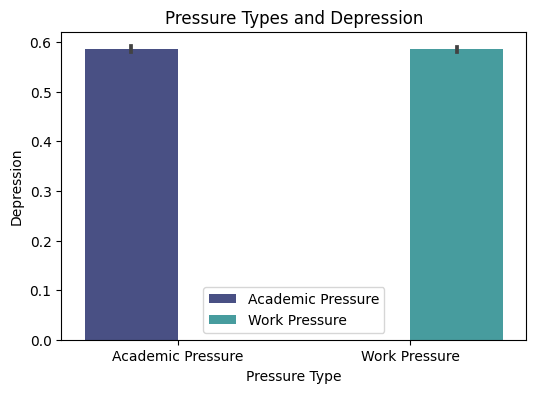

In [12]:
melted_data = pd.melt(
    data,
    id_vars=["Depression"],
    value_vars=["Academic Pressure", "Work Pressure"],
    var_name="Pressure Type",
    value_name="Pressure Level")

# Barplot 
plt.figure(figsize=(6,4))
sns.barplot(data=melted_data, x="Pressure Type", y="Depression", hue="Pressure Type", palette="mako")
plt.title("Pressure Types and Depression")
plt.legend(loc='lower center')

melted_data.groupby("Pressure Type")["Depression"].sum()

%100 precent same!

In [13]:
#Join Academic Pressure and Work Pressure
merge=[data["Academic Pressure"] , data["Academic Pressure"]] 
Pressure = pd.concat(merge ,axis=0,ignore_index=True)

In [14]:
data.drop(columns=["Academic Pressure" ,"Work Pressure"] , inplace=True)
data["Pressure"]=Pressure

In [15]:
data.head(3)

,Age,Profession,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Depression,depression/job,Pressure
0,33.0,Student,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,1,16308,5.0
1,24.0,Student,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,0,16308,2.0
2,31.0,Student,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,0,16308,3.0


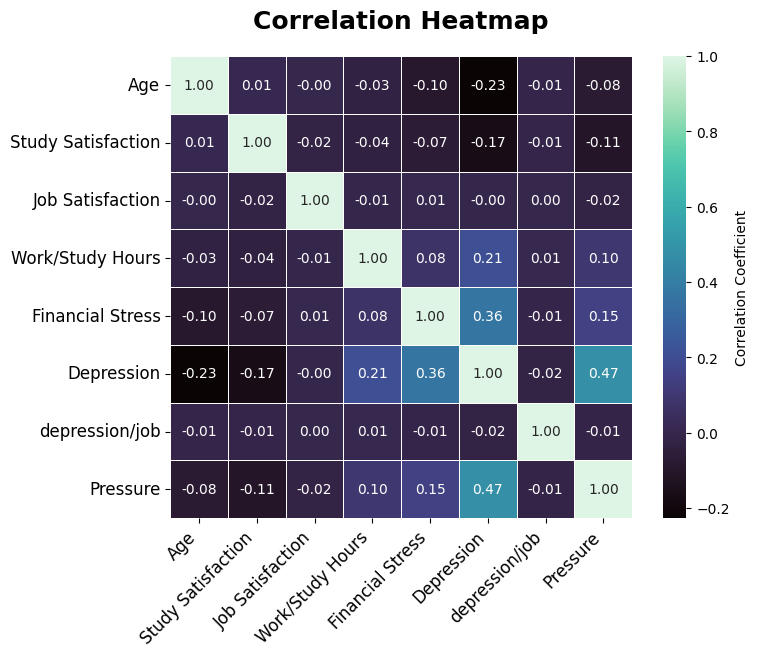

In [16]:
numerical_data=data.select_dtypes(include="number")
# Create the heatmap
plt.figure(figsize=(8,6))  
heatmap = sns.heatmap(
    data=numerical_data.corr(),
    annot=True,  
    fmt=".2f", 
   cmap="mako",  
    cbar_kws={"shrink": 1, "label": "Correlation Coefficient"},  
    linewidths=0.5, 
    square=True  
)

plt.title("Correlation Heatmap", fontsize=18, weight='bold', pad=20)
plt.xticks(fontsize=12, rotation=45, ha="right") 
plt.yticks(fontsize=12)  
plt.show()

Depression and age have negative correlation

In [17]:
#Drop the age
data.drop(columns=("Age"),inplace=True)

Satisfaction Type
Job Satisfaction      16336
Study Satisfaction    16336
Name: Depression, dtype: int64


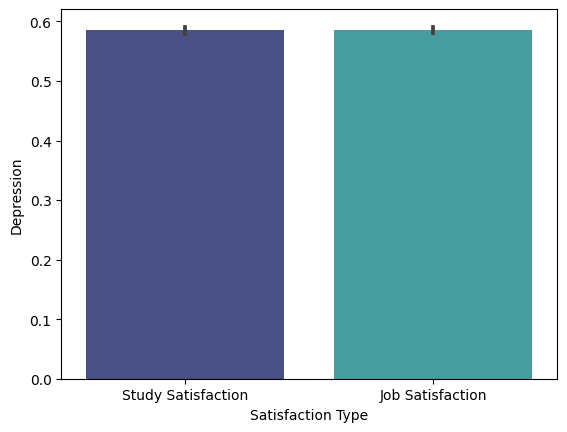

In [18]:
#sum Study Satisfaction and Job Satisfaction
melted_data2 = pd.melt(
    data,
    id_vars=["Depression"],
    value_vars=["Study Satisfaction", "Job Satisfaction"],
    var_name="Satisfaction Type",
    value_name="Satisfaction Level")
melted_data2

sns.barplot(data=melted_data2 , x="Satisfaction Type" , y="Depression",palette="mako")
print(melted_data2.groupby("Satisfaction Type")["Depression"].sum())

But Study Satisfaction has negative coralation

In [19]:
Satisfaction=pd.concat([data["Study Satisfaction"], data["Job Satisfaction"]],ignore_index=True,axis=0)
data.drop(columns=["Study Satisfaction"	,"Job Satisfaction"],inplace=True)
data["Satisfaction"]=Satisfaction

In [20]:
data.head(3)

,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Depression,depression/job,Pressure,Satisfaction
0,Student,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,1,16308,5.0,2.0
1,Student,5-6 hours,Moderate,BSc,No,3.0,2.0,0,16308,2.0,5.0
2,Student,Less than 5 hours,Healthy,BA,No,9.0,1.0,0,16308,3.0,5.0


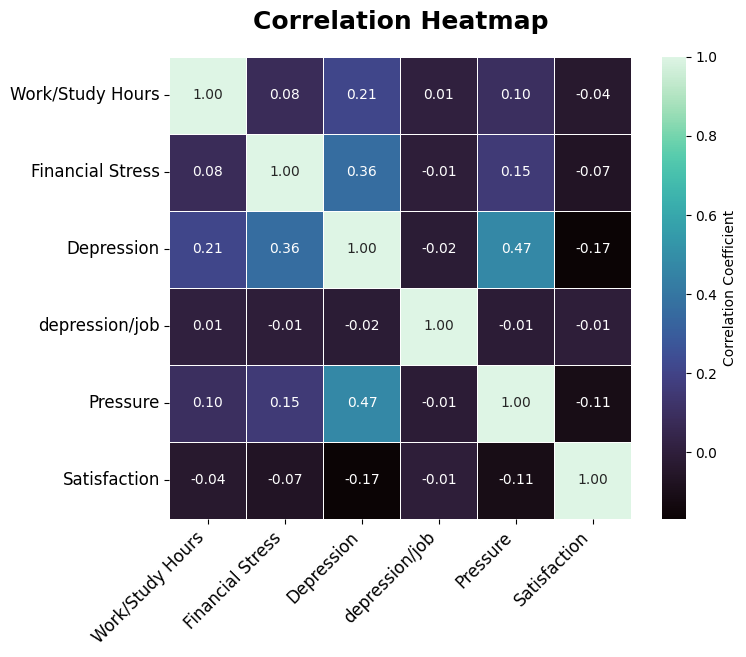

In [21]:
numerical_data_2=data.select_dtypes(include="number")

# Create the heatmap
plt.figure(figsize=(8,6))  # Adjusted figsize for better clarity  # White background for better contrast
heatmap = sns.heatmap(
    data=numerical_data_2.corr(),
    annot=True,  # Display correlation values
    fmt=".2f",  # Format values to 2 decimal places
   cmap="mako",  # Coolwarm color palette
    cbar_kws={"shrink": 1, "label": "Correlation Coefficient"},  # Shrink and label the color bar
    linewidths=0.5,  # Add lines between cells
    square=True  # Make cells square
)

# Add a title and adjust font sizes
plt.title("Correlation Heatmap", fontsize=18, weight='bold', pad=20)
plt.xticks(fontsize=12, rotation=45, ha="right")  # Rotate x-axis labels
plt.yticks(fontsize=12)  # Adjust y-axis labels
plt.show()


Yeay. merging columns didnt change anything.
lets break Satisfaction column and remove job satisfaction column

In [22]:
pd.DataFrame(data["Satisfaction"])

,Satisfaction
0,2.0
1,5.0
2,5.0
3,2.0
4,3.0
...,...
27896,5.0
27897,3.0
27898,4.0
27899,2.0


<ipython-input-23-6d184ee32300>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
<ipython-input-23-6d184ee32300>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN be

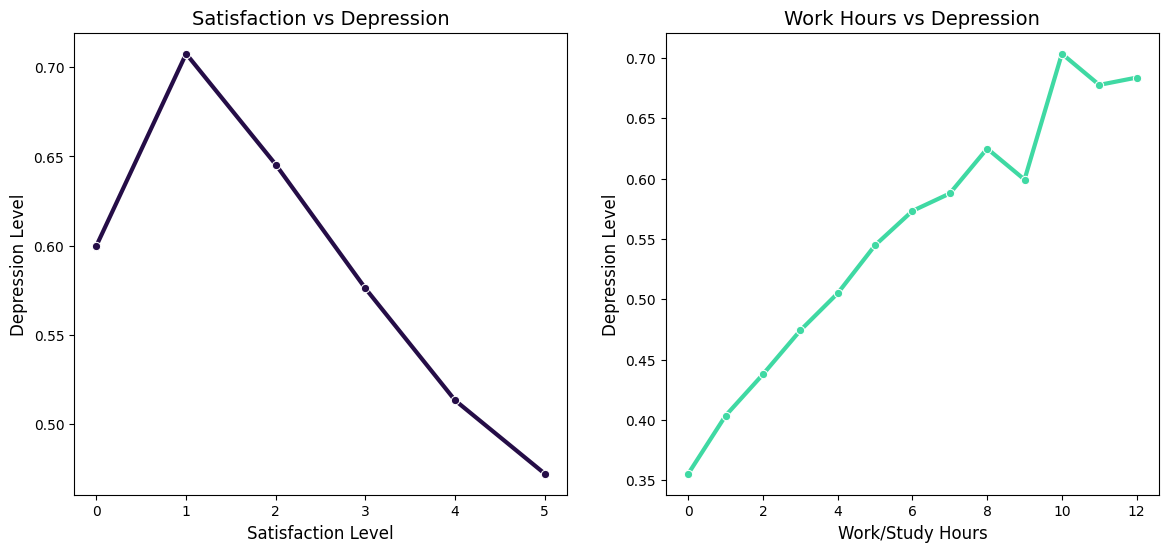

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6),facecolor="white")  

sns.lineplot(
    data=data,
    x="Satisfaction",
    y="Depression",
    marker="o",
    linewidth=3,
    color="#250d47",
    ax=axes[0],
    ci=None 
)
axes[0].set_title("Satisfaction vs Depression", fontsize=14)
axes[0].set_xlabel("Satisfaction Level", fontsize=12)
axes[0].set_ylabel("Depression Level", fontsize=12)
axes[0].grid(visible=True, linestyle="--", linewidth=0.5, color="white")

sns.lineplot(
    data=data,
    x="Work/Study Hours",
    y="Depression",
    marker="o",
    linewidth=3,
    color="#3fd9a3",
    ax=axes[1],
    ci=None  
)
axes[1].set_title("Work Hours vs Depression", fontsize=14)
axes[1].set_xlabel("Work/Study Hours", fontsize=12)
axes[1].set_ylabel("Depression Level", fontsize=12)
axes[1].grid(visible=True, linestyle="--", linewidth=0.5, color="white")



Negatice corelation with depression doesnt means column need to be dropped

In [24]:
data.columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Profession                             27901 non-null  object 
 1   Sleep Duration                         27901 non-null  object 
 2   Dietary Habits                         27901 non-null  object 
 3   Degree                                 27901 non-null  object 
 4   Have you ever had suicidal thoughts ?  27901 non-null  object 
 5   Work/Study Hours                       27901 non-null  float64
 6   Financial Stress                       27901 non-null  float64
 7   Depression                             27901 non-null  int64  
 8   depression/job                         27901 non-null  int64  
 9   Pressure                               27901 non-null  float64
 10  Satisfaction                           27901 non-null  float64
dtypes:

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Work/Study Hours'),
  Text(1, 0, 'Financial Stress'),
  Text(2, 0, 'depression/job'),
  Text(3, 0, 'Pressure'),
  Text(4, 0, 'Satisfaction')])

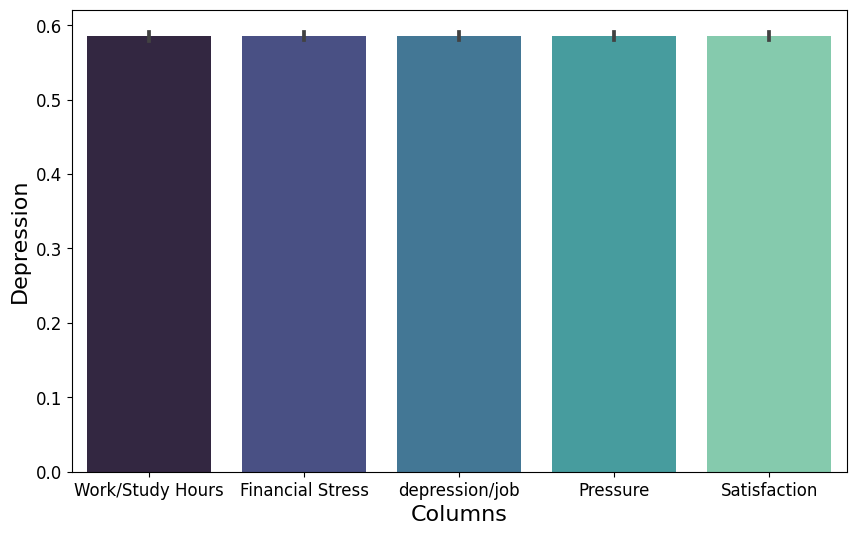

In [25]:
numerical_data_3=data.select_dtypes(include="number")
melted=pd.melt(numerical_data_3,
               id_vars="Depression",
               var_name="Subjects",
               value_name="Score"
              )

plt.figure(figsize=(10, 6))
sns.barplot(data=melted,y="Depression",x="Subjects", palette="mako")
plt.ylabel("Depression",fontsize=16)
plt.xlabel("Columns",fontsize=16)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)